# Plotting MSLP

This notebook will demonstrate how to plot MSLP data from the GFS model using the basic matplotlib library. The data is coming from GFS 0.25 model, later on we will try to use FIJI NWP model data.
For GFS 0.25 we will download the subset from this website:
https://nomads.ncep.noaa.gov/cgi-bin/filter_gfs_0p25.pl
Level : "Mean Sea Level"
Variable : "PRMSL"

The data is in GRIB2 format, so we will use the xarray library to read the data and plot it using matplotlib.
First we need to import required libraries.

## Part 1: Reading GFS data using Xarray

In [11]:
import xarray as xr

Use Xarray module to read the data

In [2]:
ds = xr.open_dataset('data/gfs.t00z.pgrb2.0p25.f003', engine='cfgrib')
ds

<xarray.Dataset>
Dimensions:     (latitude: 721, longitude: 1440)
Coordinates:
    time        datetime64[ns] ...
    step        timedelta64[ns] ...
    meanSea     float64 ...
  * latitude    (latitude) float64 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * longitude   (longitude) float64 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
    valid_time  datetime64[ns] ...
Data variables:
    prmsl       (latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    history:                 2024-06-19T13:30 GRIB to CDM+CF via cfgrib-0.9.1...

From the data above we see that the data have several coordinates and index.
Since we only use one time and step so we don't need to select the time and step.
The variables is the data we need, we will use it to make the plot. Let's see the prmsl variable and make direct plot using xarray plot method.

In [4]:
ds['prmsl']

<xarray.DataArray 'prmsl' (latitude: 721, longitude: 1440)>
[1038240 values with dtype=float32]
Coordinates:
    time        datetime64[ns] ...
    step        timedelta64[ns] ...
    meanSea     float64 ...
  * latitude    (latitude) float64 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * longitude   (longitude) float64 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
    valid_time  datetime64[ns] ...
Attributes: (12/29)
    GRIB_paramId:                             260074
    GRIB_dataType:                            fc
    GRIB_numberOfPoints:                      1038240
    GRIB_typeOfLevel:                         meanSea
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    ...                                       ...
    GRIB_name:                                Pressure reduced to MSL
    GRIB_shortName:                           prmsl
    GRIB_units:                               Pa
    long_name:                                Pressure reduced to MSL
    units:                                    Pa
    standard_name:                            unknown

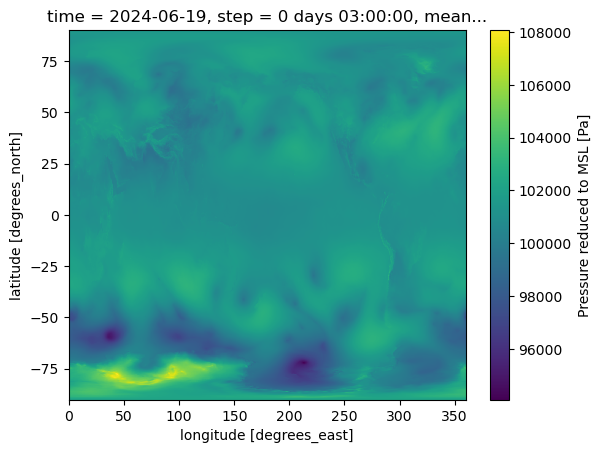

In [5]:
ds['prmsl'].plot()

Question:
1. What is the variable name and unit of the data?
2. What is the domain of the data?
3. What is the time and step of the data?

See that the data cover global area, we will subset the data to only cover pacific area. See also that the units in Pa, we will convert it to hPa.

In [15]:
longitude = slice(165,205)
latitude = slice(-5,-35)
prmsl = ds['prmsl']/100

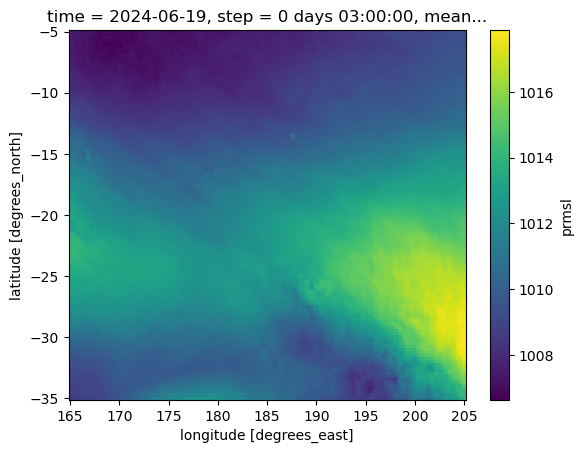

In [16]:
prmsl.sel(longitude=longitude, latitude=latitude).plot()

Now the domain looks better.
Since Xarray plot method is quite limited to make plots based on our need, we will use matplotlib to make the plot.
We will use "prmsl" variable since we have subset the data.

## Part 2: Plotting MSLP using Matplotlib

Let's import matplotlib and cartopy library.

In [35]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

Extract the required variables from the "prmsl" data, we need the longitude, latitude, and the data itself.

In [36]:
# Extract the required variables from 'prmsl'
prmsl = prmsl.sel(longitude=longitude, latitude=latitude)
lons = prmsl.longitude
lats = prmsl.latitude

Text(0, 0.5, 'Latitude')

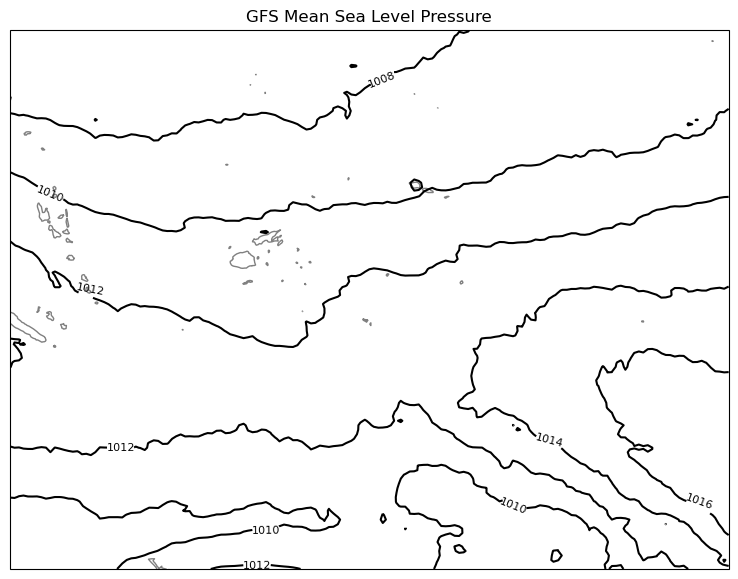

In [73]:
# Initiate figure and axes instance
fig, ax = plt.subplots(1, 1, figsize=(13, 7), subplot_kw={'projection': ccrs.PlateCarree(central_longitude=185)})

# Plot the data as contour
# levels = [990, 1000, 1002,1004, 1006, 1010,1012,1014,1016,1018,1020,1024,1028] # Define the levels here or use range 
levels = range(990,1028,2)
contour = ax.contour(lons, lats, prmsl, transform=ccrs.PlateCarree(), colors='black', levels=levels)

# Add contour labels
ax.clabel(contour, inline=True, fontsize=8)

# Add coastlines
ax.coastlines(color='gray', edgecolor='gray')

# Add titles
ax.set_title('GFS Mean Sea Level Pressure')

ax.set_xlabel('Longitude',fontsize=5)
ax.set_ylabel('Latitude',fontsize=5)

# Save the image
# plt.savefig("test_result.png")

At this step, we have made a basic contour plot using matplotlib and cartopy library. Next we can customize our plot to add more information.

## Part 3: Customizing the plot

### 3.1 Smoothing the contour plot using scipy library
As you see the contour from the previous plot is jagged, we can smooth out the contour by using gaussian_filter from scipy module

In [38]:
from scipy.ndimage import gaussian_filter

In [39]:
smoothed_prmsl = gaussian_filter(prmsl, sigma=2)

The gaussian_filter is applied to the prmsl_domain data with a specified sigma value, which controls the amount of smoothing. You can adjust sigma to get the desired level of smoothness.

### Exercise
1. Using the previous code to plot, try to plot the smoothed_prmsl data.
2. Play with the sigma value (0 and 5) and see the result

### 3.2 Add text information
Now we need to add title and time information to the plot. You can easily use ax.set_title for the easy way but let's learn the hard way.
Let's use the ax.text method to customize the position and the text itself.

In [44]:
main_title = 'Mean Sea Level Pressure (MSLP) hPa'
time_text = 'Valid : 2024-06-19 03:00 UTC'
model_text = 'Source : GFS 0.25 deg'

In [50]:
ax.text(-0.1, 1.12, main_title, transform=ax.transAxes, fontsize=14, fontweight='bold', ha='left')
ax.text(-0.1, 1.08, time_text, transform=ax.transAxes, fontsize=11, ha='left')
ax.text(-0.1, 1.04, model_text, transform=ax.transAxes, fontsize=11, ha='left')

plt.subplots_adjust(top=0.85)

<Figure size 640x480 with 0 Axes>

1. ax.text for main title: ax.text(-0.1, 1.15, main_title, transform=ax.transAxes, fontsize=16, fontweight='bold', ha='left') places the main title at the specified position relative to the axes (ax.transAxes transforms coordinates to the axes system). Adjust the position by modifying the x and y position (-0.1, 1.12 respectively).
2. plt.subplots_adjust: Adjusts the top margin to ensure there is enough space for the title and subtitle.

### Exercise
1. Modify time_text by the value from time coordinate of the data, hint: use the value from the time coordinates in dataset and format the datetime object to text.
2. Incorporate it to the plotting code block and see the result.

### 3.3 Adding Image to the plot
In this part we are going to add the Fiji Government logo to the top left side beside the title information

In [52]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [ ]:
# add logo
logo_path = 'data/Coat_of_arms_of_Fiji.png'
logo = plt.imread(logo_path)
imagebox = OffsetImage(logo,zoom=0.1)
ab = AnnotationBbox(imagebox, (0, 1.17), xycoords='axes fraction', frameon=False, box_alignment=(0, 1))
ax.add_artist(ab)

Explanation:
1. plt.imread: This function loads the image file.
2. Creating an OffsetImage: The OffsetImage is created with a zoom level to resize the logo appropriately.
3. Creating an AnnotationBbox: The AnnotationBbox places the logo at the specified coordinates relative to the axes (xycoords='axes fraction' and box_alignment to align the box).
4. Adding the logo to the plot: The logo is added to the plot using ax.add_artist(ab).

### Exercise
1. Incorporate the blocks to the plotting block and see the result.
2. Adjust the text position to fit the image.

### 3.4 Adding More Image
Suppose you have a tropical cyclone in the area and you want to include it in the map. We can achieve it the same way as adding logo. The difference is in the way we define the position.

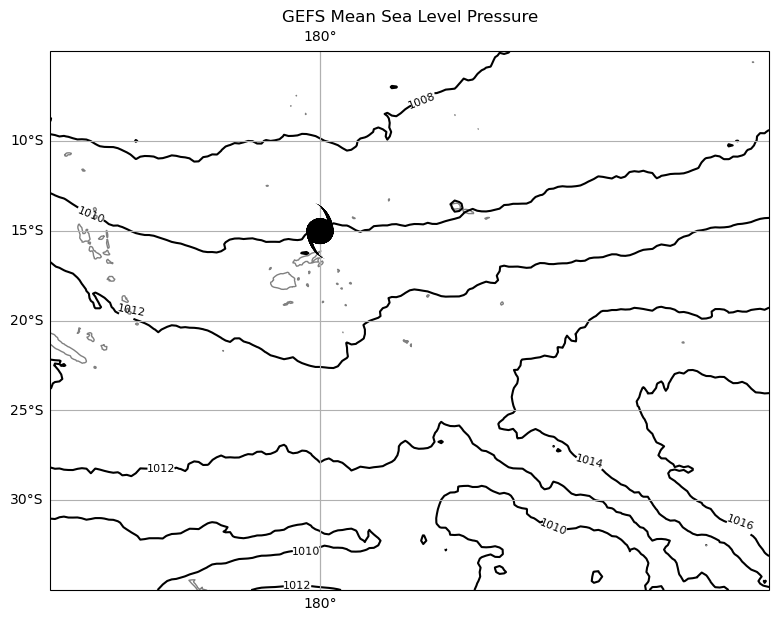

In [66]:
# Coordinates for the tropical cyclone image
cyclone_lat = -15  # Replace with actual latitude
cyclone_lon = 180  # Replace with actual longitude

# Load and add the tropical cyclone image
cyclone_image_path = 'data/Hurricane_south.png'  # Replace with the actual path to the cyclone image
cyclone_image = plt.imread(cyclone_image_path)
imagebox_cyclone = OffsetImage(cyclone_image, zoom=0.2)  # Adjust the zoom level to resize the cyclone image

# Convert latitude and longitude to projection coordinates
xy = ax.projection.transform_point(cyclone_lon, cyclone_lat, ccrs.PlateCarree())

ab_cyclone = AnnotationBbox(imagebox_cyclone, xy, frameon=False)

ax.add_artist(ab_cyclone)

Explanation:
1. Loading the tropical cyclone image: The cyclone image is loaded using plt.imread.
2. Creating an OffsetImage for the cyclone: An OffsetImage is created for the cyclone image with a zoom level to resize it appropriately.
3. Converting coordinates: The latitude and longitude of the cyclone are converted to projection coordinates using ax.projection.transform_point.
4. Creating an AnnotationBbox for the cyclone: The AnnotationBbox places the cyclone image at the specified coordinates.
5. Adding the cyclone image to the plot: The cyclone image is added to the plot using ax.add_artist(ab_cyclone).

### Exercise
1. Define latitude and longitude for tropical cyclone
2. Plot the image

### 3.5 Modify gridlines

If you see from the first plot, we don't have any grid lines showing latitude and longitude. In this part we will add the gridlines and customize as we need.

In [74]:
from matplotlib.ticker import FixedLocator # to set the lat lon values needed to plot

In [75]:
# Draw gridlines with labels
gl = ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')

gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 10, 'color': 'gray'}
gl.ylabel_style = {'size': 10, 'color': 'gray'}

# Set specific values for the gridlines
gl.xlocator = FixedLocator([165, 170, 175, 180, 185, 190, 195, 200, 205])
gl.ylocator = FixedLocator([-35, -30, -25, -20, -15, -10, -5])

Explanation:
1. Customizing gridline values: FixedLocator from matplotlib.ticker is used to specify the exact positions of the latitude and longitude gridlines.
2. Setting specific gridline values: gl.xlocator and gl.ylocator are set to FixedLocator instances with lists of desired longitude and latitude values.

### Exercise
1. Set the grid value you want to add
2. Incorporate to the plotting block.

## Your Turn

Now you have all you need to know to build a MSLP map. It is your turn now to build the full script, use all the thing and codes from previous part and make it into one functional script in the block below.
<br>*You need to complete this* as we will use the script to handle data from Fiji NWP.

In [76]:
## Import

## Read data

## Plot

## Customize

## Save